
#تحلیل احساس 

---



#IMDB Dataset

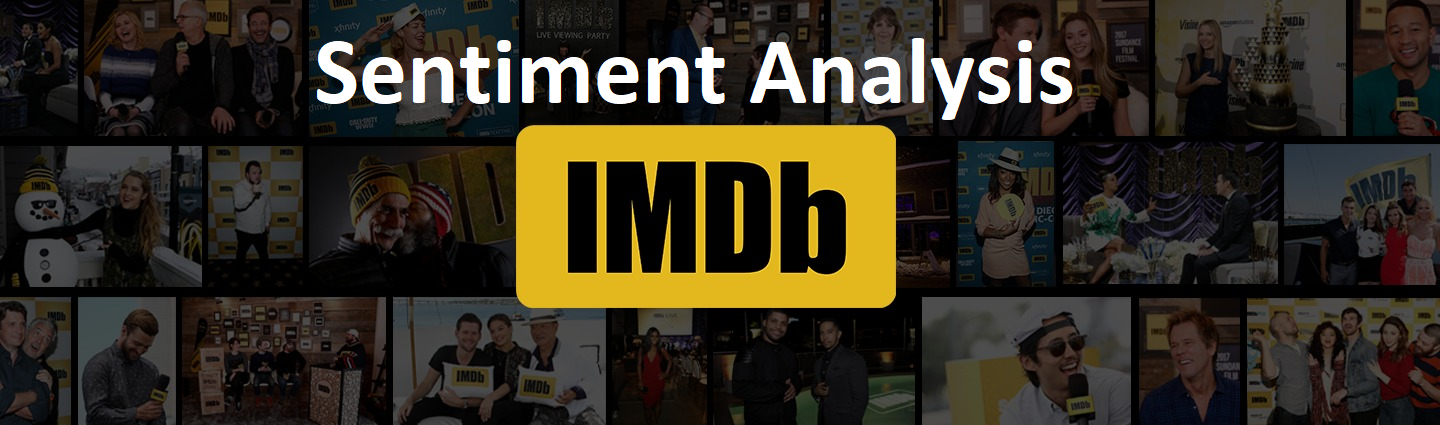

##Step1: Loading Data  

In [ ]:
!git clone https://github.com/rezashokrzad/Dataset.git

Cloning into 'Dataset'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
!unrar x "IMDB-Sentiment-Analysis/IMDB_Dataset.rar" "."


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Dataset/IMDB_Dataset.rar

Creating    ./IMDB_Dataset                                            OK
Extracting  ./IMDB_Dataset/IMDB Dataset.csv                                0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 9

##Step2: Data Visualization

In [ ]:
#pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
import pandas as pd
df_review = pd.read_csv('IMDB_Dataset/IMDB Dataset.csv')
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


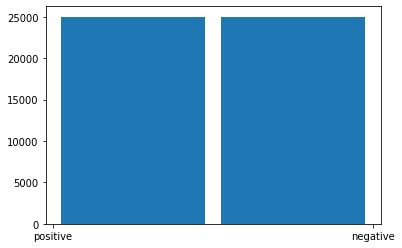

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_review['sentiment'], bins=2, rwidth=0.9);

##Step3: Train Test Split Phase

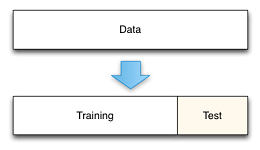

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_review, test_size=0.33, random_state=42)

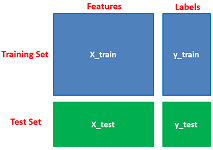

In [ ]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

##Step4: Data Representation

In [ ]:
#TFIDF: Term Frequency–Inverse Document Frequency
#TF-IDF is intended to reflect how relevant a term is in a given document
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=3000, 
                        token_pattern=r'([a-zA-Z]{3,})')
train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

<33500x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 2066269 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())
#the importance of stemming

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandoned,ability,able,absolute,absolutely,absurd,abuse,academy,accent,accents,accept,accepted,accident,accidentally,according,account,accurate,achieve,achieved,act,acted,acting,action,actions,actor,actors,actress,actresses,acts,actual,actually,adam,adaptation,add,added,adding,addition,adds,admit,adult,...,wood,wooden,woods,woody,word,words,work,worked,workers,working,works,world,worry,worse,worst,worth,worthwhile,worthy,wouldn,wow,write,writer,writers,writing,written,wrong,wrote,wwii,yeah,year,years,yes,york,young,younger,youth,zero,zombie,zombies,zone
23990,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.03791,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8729,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.176745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079731,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3451,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.243801,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.142245,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2628,0.0,0.000000,0.0,0.000000,0.113286,0.159882,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.196925,0.00000,0.0,0.151545,0.0,0.0,0.0,0.000000,0.0,0.118371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
38352,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146013,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.201213,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126441,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.168284,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
44732,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.159335,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.000000,0.0,0.179459,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0

In [ ]:
test_x_vector = tfidf.transform(test_x)
#it's not fit_transform(test_x), why?

In [ ]:
#sklearn: Simple and efficient tools for predictive data analysis

from sklearn.svm import SVC
svc = SVC(kernel='sigmoid')
svc.fit(train_x_vector, train_y)

SVC(kernel='sigmoid')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.87      0.89      0.88      8292
    negative       0.89      0.87      0.88      8208

    accuracy                           0.88     16500
   macro avg       0.88      0.88      0.88     16500
weighted avg       0.88      0.88      0.88     16500



In [ ]:
print(svc.predict(tfidf.transform(['A was not bad movie']))) #the importance of n-grams and recurrent networks
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['negative']
['positive']
['negative']


In [ ]:
print(svc.predict(tfidf.transform(['I love writing code in Python. I love Python code'])))
print(svc.predict(tfidf.transform(['I dislike writing code in Java. I hate Java code'])))

['positive']
['positive']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            dec_tree.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.72      0.71      0.71      8292
    negative       0.71      0.72      0.72      8208

    accuracy                           0.72     16500
   macro avg       0.72      0.72      0.72     16500
weighted avg       0.72      0.72      0.72     16500



In [ ]:
print(dec_tree.predict(tfidf.transform(['A was not bad movie'])))
print(dec_tree.predict(tfidf.transform(['An excellent movie'])))
print(dec_tree.predict(tfidf.transform(['I did not like this movie at all'])))

['negative']
['positive']
['positive']


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

In [ ]:
print(gnb.predict(tfidf.transform(['A was not bad movie']).toarray()))
print(gnb.predict(tfidf.transform(['An excellent movie']).toarray()))
print(gnb.predict(tfidf.transform(['I did not like this movie at all']).toarray()))

['negative']
['positive']
['negative']


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

In [ ]:
print(log_reg.predict(tfidf.transform(['A was not bad movie'])))
print(log_reg.predict(tfidf.transform(['An excellent movie'])))
print(log_reg.predict(tfidf.transform(['I did not like this movie at all'])))

['negative']
['positive']
['negative']


In [ ]:
# svc.score('Test samples', 'True labels')
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

0.8787272727272727
0.7153333333333334
0.8110909090909091
0.8838181818181818


In [ ]:
#F1_Score = 2*(Recall * Precision) / (Recall + Precision)
from sklearn.metrics import f1_score
f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.88084321, 0.87653483])